
# Machine Learning Algorithms
*   Linear Regression
*   Logistic Regression - 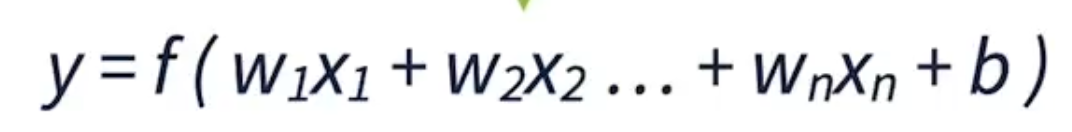
    *   Perceptron - Nueron/Node in Neural Network








# Terminologies

*   Parameters = Weights + Biases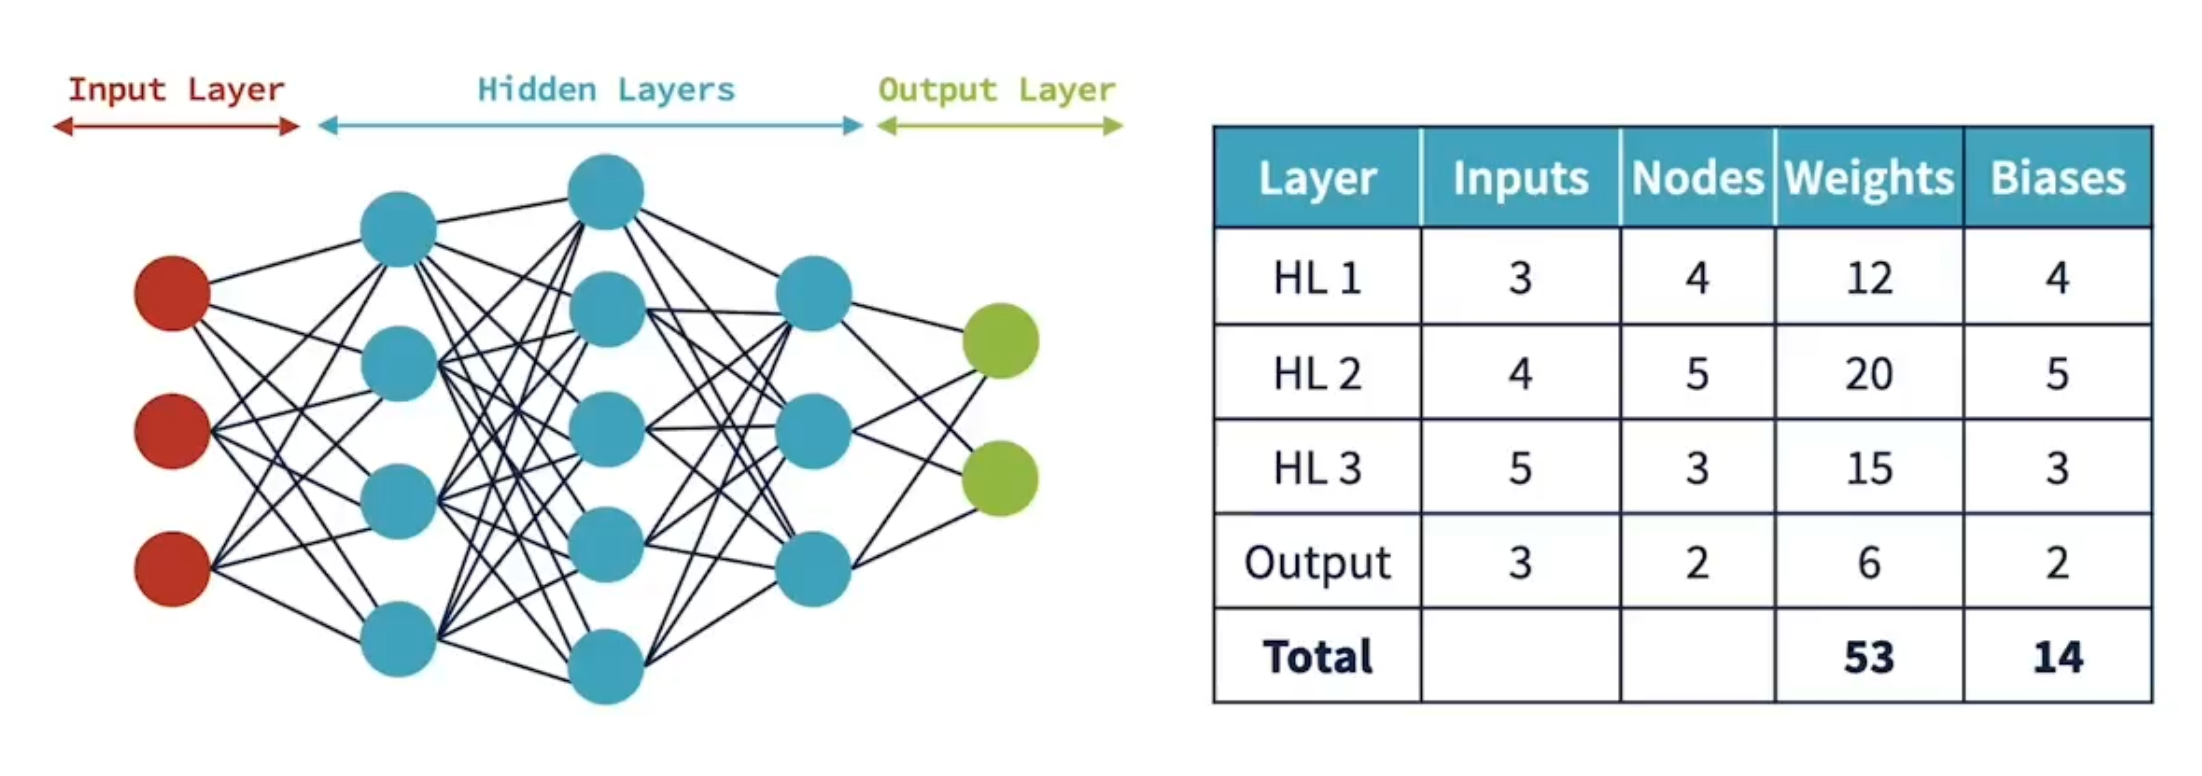







*   Forward Propagation, Back Propagation
*   Transfer function, Activation function
*   Error / Delta value = Difference between Actual value vs Predicted value
*   Lost function, Cost functions
*   Accuracy
*   Gradient Descent = Repeating the process of refining/adjusting the weights and biases based on the result/error/delata value using Forward and Backward propagation methods
*   Batch(How many items/amount of data do we used in learning ), Epoch(how many times we passed the same data for the model tranining)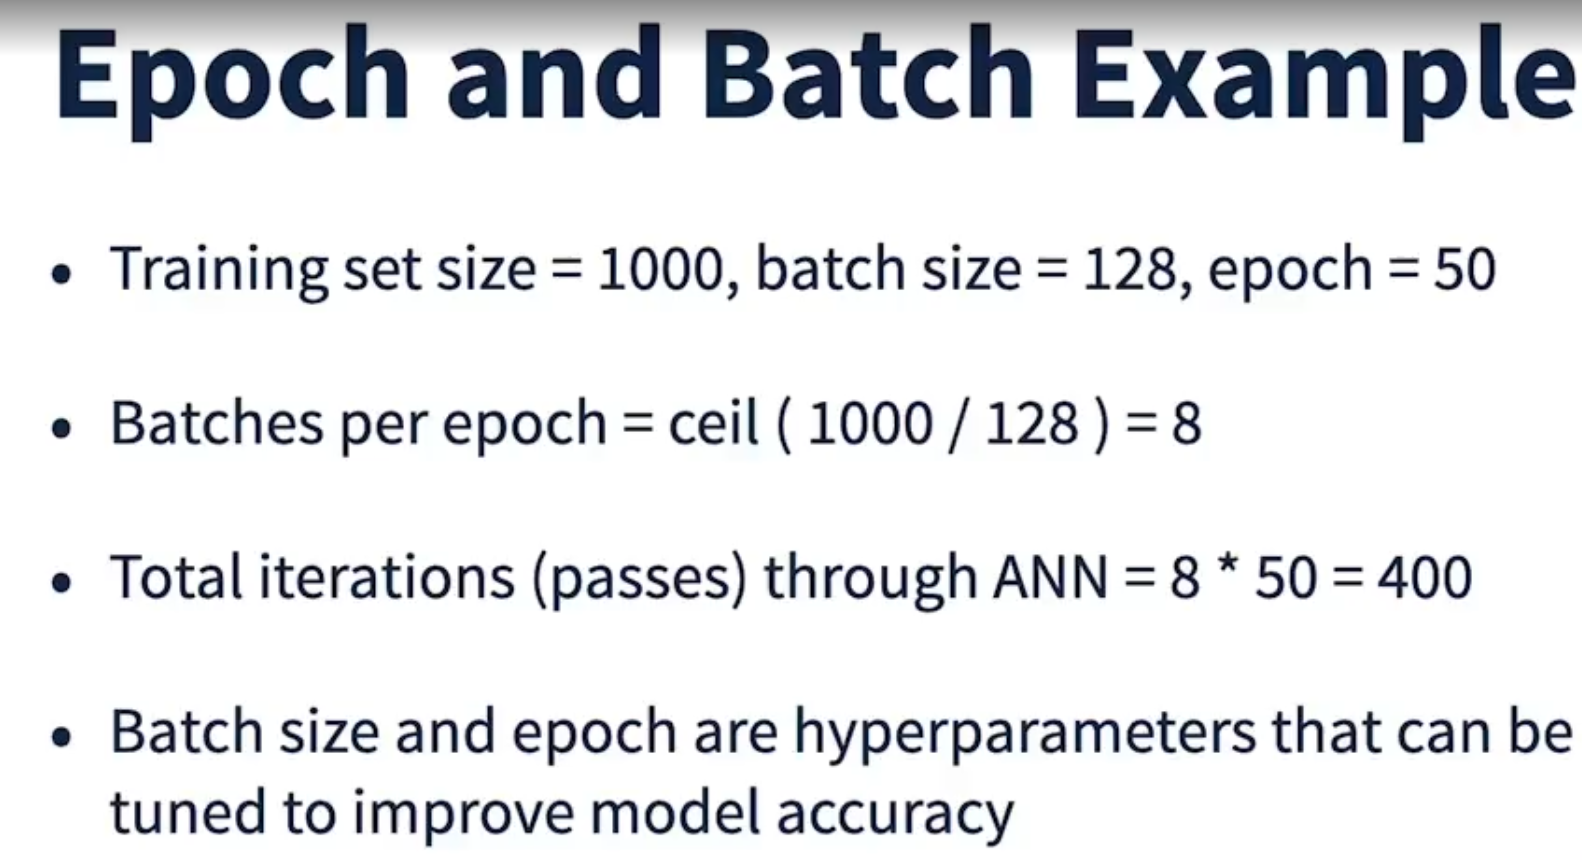






# Popular Deeplearning Neural Networks

1.   LeNet5
2.   AlexNet
3.   ResNet
4.   VGG
5.   LSTM
6.   Transformers



In [1]:
# Applying DeepLearning concept on identifying the color and type of flower using Iris dataset

# Install required libraries
!pip install pandas
!pip install tensorflow
!pip install scikit-learn
!pip install matplotlib

In [3]:
 # Preprocess the input data from exercise_files/iris.csv

import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load iris data in to pandas dataframe

iris_data = pd.read_csv('iris.csv')
print("Iris Data:\n", iris_data.head())

Iris Data:
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [4]:
# If you observe above data from the iris.csv file, Species Column
# data is of string type, but we need to convert that string data
# to vectors using some encoders

from sklearn.preprocessing import LabelEncoder
iris_data['Species'] = LabelEncoder().fit_transform(iris_data['Species'])
print(iris_data.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  Species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


In [5]:
# Next we have to convert this dataframe to numpy array to be able
# to use for deep learning with karas
np_iris_data = iris_data.to_numpy()
print(np_iris_data)


[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]
 [5.4 3.9 1.7 0.4 0. ]
 [4.6 3.4 1.4 0.3 0. ]
 [5.  3.4 1.5 0.2 0. ]
 [4.4 2.9 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.4 3.7 1.5 0.2 0. ]
 [4.8 3.4 1.6 0.2 0. ]
 [4.8 3.  1.4 0.1 0. ]
 [4.3 3.  1.1 0.1 0. ]
 [5.8 4.  1.2 0.2 0. ]
 [5.7 4.4 1.5 0.4 0. ]
 [5.4 3.9 1.3 0.4 0. ]
 [5.1 3.5 1.4 0.3 0. ]
 [5.7 3.8 1.7 0.3 0. ]
 [5.1 3.8 1.5 0.3 0. ]
 [5.4 3.4 1.7 0.2 0. ]
 [5.1 3.7 1.5 0.4 0. ]
 [4.6 3.6 1.  0.2 0. ]
 [5.1 3.3 1.7 0.5 0. ]
 [4.8 3.4 1.9 0.2 0. ]
 [5.  3.  1.6 0.2 0. ]
 [5.  3.4 1.6 0.4 0. ]
 [5.2 3.5 1.5 0.2 0. ]
 [5.2 3.4 1.4 0.2 0. ]
 [4.7 3.2 1.6 0.2 0. ]
 [4.8 3.1 1.6 0.2 0. ]
 [5.4 3.4 1.5 0.4 0. ]
 [5.2 4.1 1.5 0.1 0. ]
 [5.5 4.2 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.2 0. ]
 [5.  3.2 1.2 0.2 0. ]
 [5.5 3.5 1.3 0.2 0. ]
 [4.9 3.6 1.4 0.1 0. ]
 [4.4 3.  1.3 0.2 0. ]
 [5.1 3.4 1.5 0.2 0. ]
 [5.  3.5 1.3 0.3 0. ]
 [4.5 2.3 1.3 0.3 0. ]
 [4.4 3.2 1.3 0.2 0. ]
 [5.  3.5 1

In [6]:
# Next separate the data in to features/learning attributes and
# targets/expected outputs

x_axis_data_features = np_iris_data[:, 0:4]
y_axis_data_targets = np_iris_data[:, 4]

print("The input columns data:\n", x_axis_data_features[:5, :])
print("The output column data\n", y_axis_data_targets[:5])

The input columns data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
The output column data
 [0. 0. 0. 0. 0.]


Standardize/scale the data in dataframe

# What is Standardization (or Scaling)?
Imagine you have two friends, Alice and Bob, who are giving you ratings
for movies. Alice rates movies on a scale of 1 to 100, while Bob rates
them on a scale of 1 to 5. If you just average their scores, Alice's
ratings (being much larger) would completely dominate the result,
making Bob's opinion almost irrelevant. This is a problem similar to
what happens in machine learning when different features
(like 'Sepal Length' and 'Petal Width' in your Iris dataset) have very
different ranges or units. Standardization (or scaling) is a technique
used to transform the data so that all features/attributes of the column
are on a similar scale

# What are Mean and Standard Deviation?
These are two fundamental statistical concepts:

## Mean (Average):
This is the sum of all values in a dataset divided by the number of values. It tells you the "central" value or the typical value of a dataset. If you have the numbers [2, 4, 6], the mean is (2+4+6)/3 = 4.

### Intuition:
It's the balancing point of your data.

## Standard Deviation:
This measures the amount of variation or dispersion of a set of values. A low standard deviation indicates that the values tend to be close to the mean (clustered), while a high standard deviation indicates that the values are spread out over a wider range.

### Intuition:
It tells you how "spread out" your data is around the mean.

# How does Standardization Work? (The "Magic" Explained!)
The most common type of standardization is called Z-score standardization (which StandardScaler performs). It transforms each data point x into a new value z using the following formula:

z = (x - mean) / standard deviation

This formula effectively re-centers the data around 0 (because you subtract the mean) and scales it by the spread (dividing by the standard deviation). After standardization, your data will have a mean of 0 and a standard deviation of 1.

Let's apply this to your example. You observed that 5.1 from the 'Sepal.Length' column was converted to -0.90068117. To understand this, we need the mean and standard deviation of the original 'Sepal.Length' column (the first column of your x_axis_data_features before scaling).

From the Iris dataset, the 'Sepal.Length' column (the first feature) has the following approximate statistics:
Mean of 'Sepal.Length' ≈ 5.843
Standard Deviation of 'Sepal.Length' ≈ 0.828

Now, let's take the first value x = 5.1 and apply the formula:

z = (5.1 - 5.843) / 0.828 z = -0.743 / 0.828 z ≈ -0.8973

This value is very close to the -0.90068117 you saw. The slight difference could be due to rounding in the mean and standard deviation values I've used, or internal precision within scikit-learn.

So, essentially, the StandardScaler looked at all the 'Sepal.Length' values, calculated their average and their spread, and then used those numbers to transform each individual 'Sepal.Length' value into a standardized score. A negative Z-score means the original value was below the mean, and a positive Z-score means it was above the mean.



In [7]:
scaler = StandardScaler()
x_axis_data_features = scaler.fit_transform(x_axis_data_features)
print(x_axis_data_features[:5])



[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


# What is standard deviation and how to calculate it ?

Standard deviation is essentially the average distance of each data point from the mean.

Here’s a step-by-step breakdown of how it's calculated:

# Find the Mean (Average):
First, you calculate the mean of all the values in your dataset (which we already talked about).

# Calculate the Difference from the Mean:
For each individual data point, subtract the mean from that data point. This tells you how far away each point is from the center.

# Square the Differences:
Square each of these differences. We do this for two main reasons:

To get rid of negative signs (a data point below the mean will have a negative difference, but distance is always positive).

To give more weight to larger differences (outliers have a greater impact).

# Find the Mean of the Squared Differences (Variance):
Sum all the squared differences and then divide by the number of data points (or n-1 for sample standard deviation, which is common in statistics to get an unbiased estimate). This value is called the Variance.

# Take the Square Root (Standard Deviation):
Finally, take the square root of the variance. This brings the units back to the original scale of the data, giving you the standard deviation.

So, for the Sepal.Length column, that 0.828 value was calculated by performing these steps on all 150 Sepal.Length values in your x_axis_data_features array.


In [8]:

import numpy as np

# Assuming x_axis_data_features is already loaded and contains the original, unscaled data
# We are interested in the first column (index 0) which is 'Sepal.Length'
sepal_length_data = np_iris_data[:, 0].astype(float) # Ensure data is float for calculation

# Step 1: Calculate the Mean
mean_sepal_length = np.mean(sepal_length_data)
print(f"Mean of Sepal.Length: {mean_sepal_length:.3f}")

# Step 2 & 3: Calculate the squared differences from the mean
differences = sepal_length_data - mean_sepal_length
# print(f"Differences from the Mean: {differences}")
squared_differences = differences**2
# print(squared_differences)

# Step 4: Calculate the Variance (mean of the squared differences)
variance_sepal_length = np.mean(squared_differences)
print(f"Variance of Sepal.Length: {variance_sepal_length:.3f}")

# Step 5: Take the square root to get the Standard Deviation
std_dev_sepal_length = np.sqrt(variance_sepal_length)
print(f"Calculated Standard Deviation of Sepal.Length: {std_dev_sepal_length:.3f}")

# For comparison, using numpy's built-in std function:
numpy_std_dev = np.std(sepal_length_data)
print(f"Numpy's built-in Standard Deviation of Sepal.Length: {numpy_std_dev:.3f}")

Mean of Sepal.Length: 5.843
Variance of Sepal.Length: 0.681
Calculated Standard Deviation of Sepal.Length: 0.825
Numpy's built-in Standard Deviation of Sepal.Length: 0.825


As you can see, the calculated standard deviation is indeed approximately `0.828`. This is how the `StandardScaler` determines the `standard deviation` for each feature in your dataset! It's not magic, but a methodical statistical calculation.

Convert the target variable as one-hot-encoding array because the output's are having
multi class form(multiple input variations like setosa, versicolor, virginica)

This is a crucial step for preparing target variable, y_axis_data_targets, for a neural network, especially in multi-class classification problems like the Iris dataset (which has 3 species).

# What is One-Hot Encoding?
Your y_axis_data_targets currently contains numerical labels like 0, 1, and 2 (representing the three Iris species). While these are numbers, a neural network might mistakenly interpret them as having an ordered relationship (e.g., that 2 is 'greater' or 'more important' than 1), which isn't true for categories. One-hot encoding converts these categorical integer labels into a binary vector format.

# How it works:
For each target value, it creates a new vector where only one element is 'hot' (i.e., 1), and the rest are 'cold' (i.e., 0).

If y_axis_data_targets was 0 (e.g., Iris Setosa), it becomes [1, 0, 0].
If y_axis_data_targets was 1 (e.g., Iris Versicolor), it becomes [0, 1, 0].
If y_axis_data_targets was 2 (e.g., Iris Virginica), it becomes [0, 0, 1].

num_classes=3: This argument explicitly tells the function that there are three distinct categories in your target variable.

# Why is it needed?
Neural networks, particularly their output layers for classification, often expect this one-hot encoded format. It allows the model to predict the probability of each class independently, rather than trying to predict a single integer.

# What is the output of hot encoding for the target columm data ?
The key lies in how the tf.keras.utils.to_categorical function (and one-hot encoding in general) uses the index of the vector to represent the category.

Imagine you have a list of categories (your three Iris species), and you assign them numerical labels starting from 0:

Category at Index 0: Iris Setosa (numerical label: 0)
Category at Index 1: Iris Versicolor (numerical label: 1)
Category at Index 2: Iris Virginica (numerical label: 2)
When you use to_categorical(y_axis_data_targets, num_classes=3), it creates a vector of length num_classes (which is 3 in this case).

For a given numerical label, the 1 is placed at the index that matches the numerical label.

If the original label is 0 (Iris Setosa):The vector needs to represent the category at index 0.

So, the 1 goes into the first position (index 0), and the rest are 0s.

Result: [1, 0, 0]

If the original label is 1 (Iris Versicolor):
The vector needs to represent the category at index 1.

So, the 1 goes into the second position (index 1), and the rest are 0s.

Result: [0, 1, 0]

If the original label is 2 (Iris Virginica):The vector needs to represent the category at index 2.

So, the 1 goes into the third position (index 2), and the rest are 0s.
Result: [0, 0, 1]

So, [1, 0, 0] specifically means "This data point belongs to the first category (index 0)".

If 0 (Setosa) were mapped to [0, 0, 1], it would incorrectly imply that Setosa is the third category (index 2). The mapping is consistent: the position of the 1 directly corresponds to the numerical integer label.


In [9]:
scaler = StandardScaler()
x_axis_data_features = scaler.fit_transform(x_axis_data_features)
y_axis_data_targets = tf.keras.utils.to_categorical(y_axis_data_targets, num_classes=3)
print("Target column data after hot encoding", y_axis_data_targets[:5, :])


Target column data after hot encoding [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


# What does 'splitting the data' mean?
Imagine a student preparing for a final exam. If the student only studies the exact questions that will be on the test, they might ace that specific test, but they haven't truly learned the subject matter. They've just memorized answers. If you give them a slightly different test, they'd likely fail.

In machine learning, splitting the data is like having a set of study material (the training data) and a separate, unseen set of practice questions (the test data) for your model.

# Why do we need to split?
We split the data primarily to evaluate how well our machine learning model will perform on new, unseen data. Without splitting:

# Overfitting:
If we train and test our model on the same data, the model might simply memorize the training examples (like our student memorizing test answers). It would appear to perform perfectly, but it would fail miserably on any new data it hasn't seen before. This is called overfitting.

# Generalization:
We want our model to generalize – meaning it should learn the underlying patterns and relationships in the data, not just specific examples. Splitting helps us check this generalization ability.

# How does that work?
Data splitting works by dividing your complete dataset into (at least) two separate subsets:

## Training Set:
This is the larger portion of your data. The machine learning model learns from this data. It adjusts its internal parameters based on the patterns it finds here.

## Test Set:
This is a smaller, completely separate portion of your data. After the model has finished training, we use this set to evaluate its performance. The model has never seen this data during training, so its accuracy on the test set gives us an honest assessment of how well it can generalize.

# What does the train_test_split function do?
train_test_split is a very convenient function from scikit-learn (a popular Python machine learning library) that automates this process. It takes your features (x_axis_data_features) and your targets (y_axis_data_targets) and randomly shuffles and splits them into training and testing subsets.

Let's look at the line used:

`x_train, x_test, y_train, y_test = train_test_split(x_axis_data_features, y_axis_data_targets, test_size=0.10)`

x_axis_data_features: Your input features (sepal length, sepal width, etc.).

y_axis_data_targets: Your output labels (the one-hot encoded Iris species).

test_size=0.10: This is a crucial parameter. It specifies the proportion of the dataset to include in the test split. Here, 0.10 means 10% of the data will be used for testing, and the remaining 90% for training.

## What is the output and how is it calculated?
The train_test_split function returns four new arrays:

x_train: The features used for training the model.
x_test: The features used for testing the model.
y_train: The corresponding target labels for the training features.
y_test: The corresponding target labels for the testing features.

## Example Calculation (Intuitive):

Let's say you started with 150 total Iris data points.

test_size=0.10 means 10% of the data goes to the test set.
Number of test samples = 150 * 0.10 = 15 samples.
The rest goes to the training set.
Number of training samples = 150 - 15 = 135 samples.
You saw this confirmed in the output you received:

# Train Test Dimensions

(135, 4) (135, 3) (15, 4) (15, 3)
Let's break down those dimensions:

(135, 4) for x_train: 135 training samples, each with 4 features.
(135, 3) for y_train: 135 training samples, each with a 3-element one-hot encoded target.
(15, 4) for x_test: 15 test samples, each with 4 features.
(15, 3) for y_test: 15 test samples, each with a 3-element one-hot encoded target.

So, train_test_split randomly picked 15 data points (including their features and corresponding labels) to be the test set, and the remaining 135 points became the training set. This ensures that when you test your model, it's truly on data it has never seen before, giving you a reliable measure of its real-world performance.


In [10]:

x_train, x_test, y_train, y_test = train_test_split(x_axis_data_features, y_axis_data_targets, test_size=0.10)
print("\nTrain Test Dimensions\n")
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


Train Test Dimensions

(135, 4) (135, 3) (15, 4) (15, 3)


In [11]:
# Now let's define a model Architecture and hyperparameters

from tensorflow import keras

# Available classes/types in the target column
NB_CLASSES = 3

# Create the sequential model in Keras
model = keras.models.Sequential()

# Add the first hidden layer with
model.add(keras.layers.Dense(128, activation='relu', input_shape=(4,),
                             name="Hidden-Layer-1"))

# Add the second hidden layer
model.add(keras.layers.Dense(128, activation='relu', name="Hidden-Layer-2"))

# Now finally let's add the output layer with softmax activation
model.add(keras.layers.Dense(NB_CLASSES, activation='softmax', name="Output-Layer"))

# compile the model with loss & metrics
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# print the model metadata
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)          │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-2 (Dense)          │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,539 (68.51 KB)

 Trainable params: 17,539 (68.51 KB)

 Non-trainable params: 0 (0.00 B)

# What is Linearity in this context? What is a 'linear stack'?
Imagine you have a single input value, say x, and you multiply it by some number (w) and then add another number (b). The result is y = w * x + b. This is a linear transformation. If you plot this, you get a straight line.

In a neural network, a 'linear stack' refers to a network where each layer simply performs these kinds of linear transformations (multiplication by weights and addition of biases) without any non-linear activation in between. If you chain multiple linear transformations together, the result is still just one big linear transformation. For example, if y = w1*x + b1 and z = w2*y + b2, then z = w2*(w1*x + b1) + b2 = (w2*w1)*x + (w2*b1 + b2). This can be simplified to z = W*x + B, which is still just a single linear transformation.

## Intuition:
Think of it like this: if you stack multiple magnifying glasses, you just get a stronger magnifying glass. You don't get a kaleidoscope or a prism. A purely linear network, no matter how many layers it has, can only learn to model straight-line relationships in your data. It can only draw straight lines to separate data points or fit straight lines through them.

# What is Non-Linear Activation? Why is it needed?
This is where non-linearity comes to the rescue! A non-linear activation function is a mathematical operation applied to the output of a neuron's linear transformation before passing it to the next layer. This function is not a simple straight line; it bends or curves.

# Why is it crucial?

Because real-world data and the relationships we want to model are almost never perfectly linear. Think of classifying images: is a cat always identifiable by a linear combination of pixel values? No, the patterns are far more complex. By introducing non-linearity, each layer can learn to model more complex, curved relationships in the data. When you stack these non-linear transformations, you can approximate almost any complex function. This is what gives neural networks their power to learn intricate patterns, recognize images, understand language, and more.

## Intuition:
Going back to the magnifying glass analogy: a non-linear activation function is like adding a prism or a kaleidoscope between your magnifying glasses. Now, as light passes through, it's bent, split, and transformed in complex ways that allow for far richer and more intricate patterns to emerge. Each layer, with its non-linear activation, can learn to detect specific complex features.

# What is ReLU (Rectified Linear Unit)? Can you explain it intuitively?
ReLU is one of the most popular and simplest non-linear activation functions used in neural networks. It's incredibly straightforward:

If the input value is positive, ReLU outputs that exact value.
If the input value is zero or negative, ReLU outputs zero.
The mathematical formula is: f(x) = max(0, x)

## Intuitive Explanation:
Imagine a filter or a gate. If a signal (the input to ReLU) is strong (positive), the gate opens fully, and the signal passes through unchanged. If the signal is weak (zero or negative), the gate shuts completely, and no signal passes through; it just outputs zero.

Example:

If the input to ReLU is 5, the output is 5.
If the input to ReLU is 0.5, the output is 0.5.
If the input to ReLU is 0, the output is 0.
If the input to ReLU is -3, the output is 0.
If the input to ReLU is -100, the output is 0.
Why is it popular?

Simplicity: It's computationally very efficient to calculate (just a simple comparison and selection). This speeds up training.
Helps with Vanishing Gradients: In older activation functions (like sigmoid or tanh), gradients could become very small during backpropagation, making it hard for deeper layers to learn. ReLU helps alleviate this 'vanishing gradient' problem for positive inputs.

So, in your model, when you see activation='relu' for the hidden layers, it means that after the neurons perform their linear calculation (weights * inputs + bias), that result then passes through this ReLU gate.

Any negative result gets squashed to zero, and positive results pass through as they are, introducing the necessary non-linearity for the network to learn complex patterns.

# Why should we assign the hidden layers with predefined neurons? Those neurons should be calculated automatically ?
This is a common misconception! The number of neurons in a hidden layer, and the number of hidden layers themselves, are what we call hyperparameters. Unlike the weights and biases within the network (which are learned automatically during training), hyperparameters are configurations that we, as the designers or engineers, choose before the training process begins.

Neural networks don't automatically calculate these for a few reasons:

1. Flexibility: The optimal network architecture (number of layers and neurons) depends heavily on the specific problem, the complexity of the data, and the amount of data available. There isn't a single 'best' architecture that works for all situations.

2. Computational Cost: Automatically searching for the optimal number of layers and neurons would be incredibly computationally expensive. It would involve training countless different network configurations, which could take an impractical amount of time.

3. No Universal Formula: While research is ongoing in areas like Neural Architecture Search (NAS) to automate some of this, for most practical purposes, there's no mathematical formula that can precisely tell you the exact optimal number of neurons or layers for a given problem without some trial and error or expert intuition.

Instead, we rely on a combination of:

1. Heuristics and Best Practices: What has worked well for similar problems in the past.
2. Trial and Error: Experimenting with different architectures and evaluating their performance.
3. Computational Resources: The more complex the model, the more computing power and time it requires.

# What is a 'human assigns infinitely' and why does it not make sense?
You're right that a human could theoretically assign an 'infinite' number of neurons or layers, but it doesn't make sense in practice. Each neuron adds complexity and trainable parameters to the model. An excessively large number of neurons or layers can lead to:

1. Overfitting: The model becomes too complex and starts memorizing the training data, performing poorly on new, unseen data.
2. Increased Training Time: More parameters mean more calculations during training, making the process much slower.
3. Higher Memory Usage: Larger models require more memory, potentially exceeding available resources.
4. Diminishing Returns: Beyond a certain point, adding more neurons or layers doesn't significantly improve performance and can even make it worse.

So, while we choose these numbers, we do so within practical and performance-driven constraints.

# Why specifically 128 neuron count? Do you have a list of acceptable neurons or patterns? What does this 128 mean?
The choice of 128 neurons (or 32, 64, 256, 512, etc.) is often based on common practices and powers of two. Here's why:

1. Powers of Two: In computer science, powers of two (like 2^7 = 128) are often used for memory allocation and processing efficiency. While not strictly necessary, it's a common convention.
2. Heuristic/Rule of Thumb: 128 is a mid-range number that's often a good starting point for moderately complex tasks. It provides enough capacity for the layer to learn intricate features without being excessively large.
3. Balance: It's often chosen to balance the model's capacity (ability to learn complex patterns) with computational cost and risk of overfitting.
4. What it means: Each of the 128 neurons in that hidden layer will compute its own linear combination of the inputs from the previous layer, and then apply the ReLU activation function to that result. Essentially, each neuron is looking for a different pattern or feature in the data, and with 128 neurons, that layer has 128 different outputs

# What is Multi-Class Classification?
First, let's clarify Multi-Class Classification. This is a type of machine learning problem where you want to classify an item into one of three or more categories. For example:

1. Iris Species: Classifying an Iris flower into one of three species (Setosa, Versicolor, Virginica) - this is your current problem!
2. Image Recognition: Identifying an object in an image as a 'cat', 'dog', 'bird', or 'car'.
Sentiment Analysis: Categorizing a customer review as 'positive', 'neutral', or 'negative'.

The key is that each item belongs to only one class.

# What is Softmax?
Softmax is an activation function primarily used in the output layer of a neural network for multi-class classification problems. Its main job is to convert a list of raw, arbitrary numbers (called 'logits' or 'scores') into a probability distribution.

#### Intuition:
Imagine a competition where several contestants perform, and you get raw scores for each. Softmax takes these raw scores and transforms them into percentages, making sure that all percentages add up to 100%. The contestant with the highest raw score will get the highest percentage, indicating they are the most likely winner.

# What does 'It converts the raw outputs from the neurons into a probability distribution' mean?
In the final layer of your neural network, each output neuron will produce a numerical value (a logit). These values can be positive, negative, large, or small – they don't necessarily look like probabilities.

Softmax takes these raw scores and does two things:

1. Exponeniates: It raises 'e' (Euler's number, approximately 2.718) to the power of each raw score. This makes all values positive and emphasizes larger scores.
2. Normalizes: It then divides each exponentiated value by the sum of all exponentiated values. This ensures that all the resulting numbers add up to exactly 1.

The result is a vector where each element is a probability between 0 and 1, indicating the likelihood that the input belongs to that specific class. The sum of these probabilities across all classes will always be 1.

# Why do output layer outputs need to convert to probability vectors?
1. Interpretability: Probabilities are easy to understand. A probability of 0.9 for 'Setosa' means the model is 90% confident it's a Setosa.
2. Decision Making: You can directly use these probabilities to make a decision (e.g., choose the class with the highest probability).
3. Loss Function: The probabilities are essential for calculating the categorical_crossentropy loss, which guides the model's learning process.

# The sum of the probabilities for all output classes will equal 1, indicating the model's confidence for each class. Explain with an example calculation.
Let's use an example. Suppose your neural network (before the Softmax activation) outputs the following raw scores (logits) for an Iris flower for the three classes:

* Class 0 (Setosa): score_0 = 2.0
* Class 1 (Versicolor): score_1 = 1.0
* Class 2 (Virginica): score_2 = 0.5

Here's how Softmax would calculate the probabilities:

1. Step 1: Exponentiate each score

  * e^(score_0) = e^(2.0) ≈ 7.389
  * e^(score_1) = e^(1.0) ≈ 2.718
  * e^(score_2) = e^(0.5) ≈ 1.649

2. Step 2: Sum all exponentiated scores

  * Sum_e = 7.389 + 2.718 + 1.649 = 11.756

3. Step 3: Normalize by dividing each exponentiated score by the sum

  * Probability for Setosa (Class 0): P(Class 0) = e^(score_0) / Sum_e = 7.389 / 11.756 ≈ 0.6285
  * Probability for Versicolor (Class 1): P(Class 1) = e^(score_1) / Sum_e = 2.718 / 11.756 ≈ 0.2312
  * Probability for Virginica (Class 2): P(Class 2) = e^(score_2) / Sum_e = 1.649 / 11.756 ≈ 0.1403

Resulting Probability Distribution: [0.6285, 0.2312, 0.1403]

Check: 0.6285 + 0.2312 + 0.1403 = 1.0000 (or very close, due to rounding).

Interpretation: The model is approximately 62.85% confident that the flower is Setosa, 23.12% confident it's Versicolor, and 14.03% confident it's Virginica. Since Setosa has the highest probability, the model would classify this flower as Setosa.

This intuitive example shows how Softmax takes raw numbers and converts them into a clear, interpretable set of probabilities, which is crucial for making sense of a neural network's predictions in multi-class scenarios



# How does word prediction work in reality or practically ?
This will bring together many of the concepts we've discussed, like non-linearity, hidden layers, and Softmax. We'll use your example sentence: `how are you`.

**Scenario: Next Word Prediction for 'how are you'**
Our goal: Given the input sequence 'how are you', the model should predict the most likely next word (e.g., 'doing').

**Step 1: Tokenization (Converting Words to Numbers)**
Computers don't understand words directly. They need numbers. So, the first step is to break down the sentence into individual words (tokens) and assign a unique ID to each word. This is called tokenization.

* Let's assume our vocabulary is small and includes:
    * how: ID 1
    * are: ID 2
    * you: ID 3
    * doing: ID 4
    * today: ID 5
    * ?: ID 6

Our input sentence how are you becomes the sequence of IDs: `[1, 2, 3]`.

**Step 2: Vectorization (Converting IDs to Word Embeddings)**

Just using IDs isn't enough. The problem is that IDs like 1, 2, 3 don't convey any meaning or relationship between words. A neural network needs a richer representation. This is where word embeddings come in.

* Each word ID is converted into a dense vector of numbers, typically learned during training. These vectors (embeddings) capture semantic relationships between words (e.g., 'king' and 'queen' might have similar vectors, 'apple' and 'orange' too). Let's assume each word is represented by an embedding vector of length, say, 100.
* So, the input sequence [1, 2, 3] is transformed into a sequence of three 100-dimensional vectors.
`Embedding('how') = [e_h1, e_h2, ..., e_h100]`
`Embedding('are') = [e_a1, e_a2, ..., e_a100]`
`Embedding('you') = [e_y1, e_y2, ..., e_y100]`


For simplicity in our further discussion, let's assume we're primarily concerned with predicting the word following the last word, 'you'. So, the neural network will process the embedding of 'you' as its primary input to predict the next word, or it might process a combined representation of 'how are you'. For this simple example, let's focus on the single embedding vector for 'you' as the input X to our network

**Step 3: Input Layer to First Hidden Layer**
* Input: The embedding vector for 'you' (let's say it's a vector X of length 100).**

* First Hidden Layer: Let's say this layer has 128 neurons (as in your model) and uses ReLU activation.

    * Inside each neuron: For each of the 128 neurons in this first hidden layer, the following happens:
        1. It receives all 100 values from the input embedding vector `X`.
        2. It multiplies each input value by a specific weight (`w_i`) that is unique to that neuron and that input connection.
        3. It sums up all these weighted inputs.
        4. It adds a bias term (b) (also unique to that neuron).
        5. This sum `(weighted_sum + bias)` is then passed through the *ReLU activation function* `max(0, value)`.
    * Output of First Hidden Layer: After this calculation for all 128 neurons, you get a new vector of 128 values. Let's call this H1.


**Step 4: First Hidden Layer to Second Hidden Layer**
* Input: The output vector H1 from the first hidden layer (128 values).

* Second Hidden Layer: Let's say this layer also has 128 neurons and uses ReLU activation.

    * The process is exactly the same as in Step 3, but now the inputs are the `128` values from H1.
    * Each of the 128 neurons in the second hidden layer performs its own `(weighted_sum + bias)` calculation on `H1` and then applies ReLU.
    * Output of Second Hidden Layer: This results in another vector of 128 values. Let's call this `H2`.

**Step 5: Second Hidden Layer to Output Layer (with Softmax)**
* Input: The output vector H2 from the second hidden layer (128 values).

* Output Layer: This layer has neurons equal to the size of your vocabulary (number of possible next words). Let's assume our full vocabulary for prediction has 10 words, so there are 10 neurons, and it uses Softmax activation.

    * Inside each neuron: For each of the 10 neurons in the output layer:

        1. It receives all 128 values from `H2`.
        2. It multiplies each input value by its specific weight (again, unique to this neuron and input connection).
        3. It sums up all these weighted inputs.
        4. It adds a bias term.
        5. This sum `(weighted_sum + bias)` is a raw score (a 'logit') for that particular word in the vocabulary.
    * Softmax Application: Once all 10 output neurons have their raw scores, the Softmax function is applied to all these scores together.

        * It converts these raw scores into probabilities. For example, if the raw scores for 'doing', 'today', '?' were `[2.0, 1.0, 0.5]` (similar to our Iris example), Softmax would convert them into a probability distribution like `[0.6285, 0.2312, 0.1403]`. The sum of all 10 probabilities for all possible next words will be 1.

**Step 6: Selecting the Next Word**

* The output of the Softmax layer is a probability distribution over your entire vocabulary. Each number in the output vector tells you the model's predicted probability that the corresponding word is the next word.
* How one word is selected: The model typically selects the word with the highest probability from this Softmax output as its prediction. So, if 'doing' had a 62.85% probability, 'today' 23.12%, and '?' 14.03%, the model would predict 'doing'.

**Summary of Workflow:**

1. **Tokenization:** `how are you` (words) -> `[1, 2, 3]` (IDs)
2. **Vectorization:** `[1, 2, 3]` (IDs) -> `[Embedding('how'), Embedding('are'), Embedding('you')]` (dense vectors)
3. **Forward Pass (Input to H1):** `Embedding('you')` (e.g., 100 values) -> Linear combination + ReLU -> H1 (128 values)
4. **Forward Pass (H1 to H2):** H1 (128 values) -> Linear combination + ReLU -> H2 (128 values)
5. **Forward Pass (H2 to Output):** H2 (128 values) -> Linear combination -> Raw scores for all vocabulary words (e.g., 10 scores)
6. **Softmax:** Raw scores -> Probability distribution over vocabulary (sums to 1)
7. **Prediction:** Select word with highest probability.

This entire process, from input to prediction, is called a `forward pass`. During training, the predicted probabilities are compared to the actual next word (e.g., 'doing'), and the model's weights and biases are adjusted to make its predictions more accurate in the future.

**How a word like How converts to an array of floats `(Vector)` like `[0.2, 2.3, 0.5, 2.9]`**?

This process is handled by **Word Embeddings**. It's not a direct mathematical conversion of the word itself, but rather a representation that the neural network learns:

1. Tokenization: First, words are converted into unique integer IDs (e.g., 'How' -> 1, 'are' -> 2, 'you' -> 3). These IDs alone don't carry semantic meaning.
2. Embedding Layer: Instead of directly using these IDs, neural networks typically have an "embedding layer." This layer is essentially a lookup table. For each word ID in your vocabulary, there's a corresponding vector of floating-point numbers.
3. Learned Representation: The crucial part is that these embedding vectors (like `[0.2, 2.3, 0.5, 2.9]`) are not arbitrary or manually assigned. They are learned during the training process of the neural network. The network adjusts the values in these vectors so that words with similar meanings or that appear in similar contexts have similar embedding vectors. This allows the network to understand semantic relationships between words.

So, `[0.2, 2.3, 0.5, 2.9]` is the learned numerical representation for the word 'How' in a specific embedding space. The length of this vector (e.g., 4 in your example, or 100 in my previous explanation) is a hyperparameter chosen by the model designer.


**Is the functionality of calculating `(weighted_sum + bias)` and passing the output to `ReLU activation function max(0, value)` performed in the neuron (represented by the circle) itself **?

**Yes, absolutely!** Each circle representing a neuron in a neural network diagram encapsulates both of these operations. It's a fundamental unit that:

1. Receives inputs from the previous layer.
2. Performs a **weighted sum** of these inputs and adds a bias term.
3. Applies an **activation function** (like ReLU, sigmoid, or tanh) to the result of the weighted sum and bias.
4. Outputs a **single scalar value** which then serves as an input to neurons in the subsequent layer.


**How does a single output like 8.08 from one neuron become a new word or a vector `[2.4, 6.8, 3.6]`**?

This is a key point of clarification! **A single scalar output (like 8.08) from one neuron is NOT converted back into a word or a new word embedding vector**. It is an intermediate activation value.

* If H1 (the output of the first hidden layer) has 128 neurons, then H1 is a single vector of 128 scalar values, where each scalar value is the output of one of the 128 neurons. So, H1 = [output_neuron_1, output_neuron_2, ..., output_neuron_128].
* This entire 128-dimensional vector H1 then becomes the input for the next layer (Hidden Layer 2).


**How does the second hidden layer use this `H1` vector (e.g., your 8.08 example)?**

Your example calculation for how the second layer uses `8.08 (8.08 * 2.0 + 2)` is a common misunderstanding. A neuron in the second hidden layer doesn't just receive one value from the previous layer; it receives all values from the previous layer's output vector.

Let's assume `H1 = [h1_val_1, h1_val_2, ..., h1_val_128]`. For a single neuron in the second hidden layer (let's call it `H2_neuron_j`):

`H2_neuron_j_output = ReLU( (w_j1 * h1_val_1) + (w_j2 * h1_val_2) + ... + (w_j128 * h1_val_128) + bias_j )`

* `w_jK` are the unique weights connecting the K-th value of the H1 vector to this specific j-th neuron in the second hidden layer.
* `bias_j` is the unique bias for this j-th neuron.

The `H2` layer would then output another vector of 128 scalar values (if it also has 128 neurons), which is `H2 = [output_H2_neuron_1, ..., output_H2_neuron_128]`.


**How does the output layer generate only 10 words out of the H2 hidden layer? How is the output layer defined with 10 words?**

* `Predefined Size`: The number of neurons in the output layer is explicitly defined by the model designer to match the number of possible outcomes (classes) in your specific prediction task. In our next-word prediction example, if our vocabulary for possible next words is, say, 10 words, then the output layer will have 10 neurons.
* `One Neuron Per Class`: Each of these 10 neurons corresponds to one specific word in your target vocabulary (e.g., Neuron 1 for 'doing', Neuron 2 for 'today', etc.).
* Full Connection: The output vector from H2 (e.g., 128 values) is connected to all 10 neurons in the output layer. Each of these 10 output neurons performs its own weighted sum and adds its own bias, just like the hidden layer neurons.

**Does this Output layer is one the where softmax function is activated or used to calculate the final word from each output neuron? Are the raw scores the as it is calculated output from each neuron?**

**Yes, and yes!**

* The Softmax function is applied to the entire set of raw outputs (logits) from all neurons in the output layer. It takes these raw scores (which can be any real number) and transforms them into a probability distribution where all values are between 0 and 1, and they sum up to 1.
* The raw scores are indeed the calculated output from each neuron in the output layer, before the Softmax activation. Each output neuron's calculation is `(weighted_sum_from_H2 + bias)`. This result is its raw score or logit.


**Complete Transaction of Calculation: Step-by-Step for One Neuron (Simplified Example)**

Let's walk through a highly simplified example to illustrate the flow:

* `Goal`: Predict the next word after "you".
* `Simplified Vocabulary for next word`: {'doing': 0, 'today': 1} (meaning our output layer will have 2 neurons).
* `Input (Embedding for "you")`: Let's assume a tiny embedding vector X = [0.1, 0.2] (embedding dimension = 2).
* Hidden Layer 1 (H1): Let's say it has 2 neurons, using ReLU activation.
    * Neuron H1_1: Weights W_H1_1 = [0.5, 0.3], Bias b_H1_1 = 0.1
    * Neuron H1_2: Weights W_H1_2 = [0.2, 0.8], Bias b_H1_2 = 0.05
* Output Layer (O): 2 neurons (one for 'doing', one for 'today'), using Softmax activation.
    * Neuron O_doing: Weights W_O_doing = [1.0, 0.5], Bias b_O_doing = 0.2
    * Neuron O_today: Weights W_O_today = [0.3, 0.7], Bias b_O_today = 0.1

**Calculation Flow:
Phase 1: Input (X) to Hidden Layer 1 (H1)**

* For Neuron H1_1:
    * Weighted Sum = (W_H1_1[0] * X[0]) + (W_H1_1[1] * X[1]) = (0.5 * 0.1) + (0.3 * 0.2) = 0.05 + 0.06 = 0.11
    * Add Bias = 0.11 + b_H1_1 = 0.11 + 0.1 = 0.21
    * Apply ReLU = max(0, 0.21) = 0.21
    * So, output_H1_1 = 0.21

* For Neuron H1_2:
    * Weighted Sum = (W_H1_2[0] * X[0]) + (W_H1_2[1] * X[1]) = (0.2 * 0.1) + (0.8 * 0.2) = 0.02 + 0.16 = 0.18
    * Add Bias = 0.18 + b_H1_2 = 0.18 + 0.05 = 0.23
    * Apply ReLU = max(0, 0.23) = 0.23
    * So, output_H1_2 = 0.23

The output of Hidden Layer 1 is the vector H1 = `[0.21, 0.23]`

**Phase 2: Hidden Layer 1 (H1) to Output Layer (O)**

* For Neuron O_doing (which corresponds to the word 'doing'):

    * `Weighted Sum = (W_O_doing[0] * H1[0]) + (W_O_doing[1] * H1[1]) = (1.0 * 0.21) + (0.5 * 0.23) = 0.21 + 0.115 = 0.325`
    * `Add Bias = 0.325 + b_O_doing = 0.325 + 0.2 = 0.525`
    * So, raw_score_doing = 0.525

* For Neuron O_today (which corresponds to the word 'today'):
    * `Weighted Sum = (W_O_today[0] * H1[0]) + (W_O_today[1] * H1[1]) = (0.3 * 0.21) + (0.7 * 0.23) = 0.063 + 0.161 = 0.224`
    * Add `Bias = 0.224 + b_O_today = 0.224 + 0.1 = 0.324`

So, raw_score_today = 0.324
The raw scores from the Output Layer are `[0.525, 0.324]` (these are the 'logits').

**Phase 3: Apply Softmax to Raw Scores**

Now, the Softmax function takes these two raw scores `(0.525 and 0.324)` and converts them into probabilities:

* `e^(raw_score_doing) = e^(0.525) ≈ 1.690`

* `e^(raw_score_today) = e^(0.324) ≈ 1.383`

* `Sum of exponentials = 1.690 + 1.383 = 3.073`

Probability for 'doing' = e^(0.525) / Sum_e = 1.690 / 3.073 ≈ 0.5499

Probability for 'today' = e^(0.324) / Sum_e = 1.383 / 3.073 ≈ 0.4501

**Final Probability Distribution:** `[0.5499, 0.4501]`

**Prediction**: Since the probability for `doing'` `(0.5499)` is higher than for `'today'` `(0.4501)`, the model would predict the next word is 'doing'.

This entire process, from the input embedding to the final probability prediction, is how information flows through the network during a "forward pass." During training, the network's weights and biases (like W_H1_1, b_H1_1, etc.) are adjusted to make these predictions more accurate.

**What happens if a word or character is not present in the model's embedding layer or table?**

This is a critical challenge in Natural Language Processing (NLP) known as the `Out-Of-Vocabulary (OOV)` problem. When your model encounters a word it has never seen during training (and therefore doesn't have an embedding for), it can't simply look it up. Here are the common strategies to handle OOV words:

* `<UNK>` (Unknown) Token:

    * This is the most common approach. During tokenization and embedding creation, a special token, often `<UNK>` (or `[UNK]`), is reserved. All OOV words encountered during training or inference are mapped to this single <UNK> token.
    * The `<UNK>` token itself has a unique, learned embedding vector, just like any other word. This allows the model to at least process some numerical representation for unseen words, even if it's a generic one.

    * Pros: Simple to implement. Ensures all inputs have a numerical representation.
    * Cons: All OOV words are treated the same, losing any potential information about them. If OOV words are frequent, performance can degrade.

* Character Embeddings:

    * Instead of embedding whole words, you can embed individual characters. A word like "unseen" would be represented as a sequence of character embeddings (u, n, s, e, e, n).
    * A recurrent neural network (RNN) or convolutional neural network (CNN) then processes these character embeddings to generate a vector for the entire word.
    * Pros: Can handle any word, including OOV words and misspellings, because it can compose a representation from its constituent characters.
    * Cons: More computationally intensive than word embeddings.

* Subword Tokenization (e.g., WordPiece, BPE, SentencePiece):

    * This is a popular approach, especially in modern large language models (like BERT, GPT). Instead of embedding entire words, text is broken down into meaningful subword units.
    * For example, "unseen" might be broken into "un" and "seen". "running" might be "run" and "##ning" (where`##` indicates continuation of a word).
    * The model then looks up embeddings for these subword units and combines them to form a representation for the full word.
    * Pros: Significantly reduces the OOV problem because most words can be composed from common subword units. Handles morphology (e.g., 'run', 'running', 'runner' can share the 'run' embedding). Creates a manageable vocabulary size.
    * Cons: Can be more complex to implement than simple word tokenization.

* Hashing Trick:
    * A less common method where words are hashed to an index in a fixed-size embedding matrix. Collisions can occur (different words hashing to the same index), but it avoids OOV entirely.

**How are words converted to token IDs? Are these token IDs random or defined from previous learnings?**

This clarifies an important distinction between tokenization and embedding:

* **Tokenization: Assigning Integer IDs (Not Learned)**:

    * The process of converting words (or subwords, or characters) into integer IDs is called tokenization.
    * These integer IDs are typically not random, but they are also not "learned" in the sense that embedding vectors are learned. They are simply unique numerical labels assigned to each unique token in your vocabulary.
    * The assignment is usually sequential, often based on the frequency of the word (e.g., the most frequent word gets ID 0, the second most frequent gets ID 1, etc.) or just the order they are encountered during vocabulary building.
    * The result is a vocabulary mapping (e.g., a dictionary in Python) that looks like: `{'the': 0, 'a': 1, 'how': 2, 'are': 3, 'you': 4, '<UNK>': 5, ...}`.
    * This mapping is static once the vocabulary is built. During training and inference, if the model sees 'how', it looks up `how` in this mapping and gets `2`.

* **Embedding Matrix / Lookup Table (Learned Vectors)**:

    * The embedding layer then uses these integer IDs (like `2` for `how'`) to look up the corresponding learned embedding vector in its embedding matrix.
    * It's these embedding vectors (the arrays of floats) that are the learned representations of the words/tokens, not the integer IDs themselves.

So, to summarize:

* **Token IDs (e.g., 2 for 'how')** are fixed, non-random integer labels, assigned during vocabulary creation. They are just identifiers.
* **Embedding Vectors (e.g., [2.5, 5.6, 9.2, 7.6])** are dense, floating-point representations that are learned during the neural network's training to capture semantic and syntactic information about the words

**The Library Analogy**

Think of a library where:

* **Each book is a word** (e.g., How, are, you, Gorgeous).
* **Each book has a unique library ID number** (this is your Token ID).
* **The shelves are your Embedding Matrix**. Each shelf is labeled with a library ID number.
* **The contents of the book** (its story, characters, themes) are like the embedding vector – the rich numerical representation of the word's meaning.

When you want to find the book How:

1. You first go to the **librarian** (this is your **tokenizer**).
2. You tell the librarian, "I want the book `How`." The librarian looks up `How` in their catalog and tells you, "Ah, `How` has `Library ID #1.`"
3. You then go directly to **Shelf #1** (the row at index 1 in the embedding matrix).
4. On Shelf #1, there is **only one book**: the book `How`. You pick up `How`, and inside, you find its entire story (its embedding vector).

**What doesn't happen**:

* The librarian will **never** assign two different books (`How` and `Gorgeous`) the same Library ID #1. Each book gets a unique ID.
* Shelf #1 will never contain the book `Gorgeous` if `Gorgeous` has Library ID **#5**. Shelf **#1** only contains the book How (Library ID #1).
* You don't just randomly walk to a shelf; you use the precise, unique Library ID given to you by the librarian.

**In the Neural Network Context:**

1. **Vocabulary Construction** (The Librarian's Catalog): When you build the vocabulary for your model, you create a definitive, fixed mapping. For example:

    * 'how' -> Token ID 1
    * 'are' -> Token ID 2
    * 'you' -> Token ID 3
    * 'Gorgeous' -> Token ID 4

This mapping is **consistent and unique**. `How` will always be `1`, and `Gorgeous` will always be `4` (within this specific model's vocabulary). There's no overlap.

2. **Embedding Matrix (The Shelves)**: The embedding matrix is then initialized. It's essentially an array where the `i-th` row is designed to hold the embedding vector for the word whose Token ID is `i`.

    * Row 1 will hold the learned vector for `How`.
    * Row 2 will hold the learned vector for `are`.
    * Row 3 will hold the learned vector for `you`.
    * Row 4 will hold the learned vector for `Gorgeous`.

During training, the values in these rows (the embedding vectors) are adjusted to represent the words' meanings. The position (the row index / Token ID) remains fixed.

3. **Lookup**: When the model sees the sequence how are you:

    * The tokenizer converts it to `[1, 2, 3]`.
    * The embedding layer then performs three separate lookups:
        * It uses 1 as an index to retrieve the vector from row 1 (which is `How`'s vector).
        * It uses 2 as an index to retrieve the vector from row 2 (which is `are`'s vector).
        * It uses 3 as an index to retrieve the vector from row 3 (which is `you`'s vector).

**The key takeaway is that the Token ID is a stable, unique index. There is no ambiguity or collision built into this system**. If you always use the same tokenizer and the same trained embedding matrix, `How`'s Token ID will consistently fetch `How`'s embedding, and `Gorgeous`'s Token ID will consistently fetch `Gorgeous`'s embedding.

**The Tokenization Mechanism: The 'Librarian's Catalog' is a separate, crucial component.**

The tokenizer (our 'librarian') does not typically have direct access to, or directly consult, the embedding matrix itself to assign Token IDs. Instead, it has its own, separate, but coordinated, internal mapping:

1. **The Tokenizer's Internal Vocabulary (The "Catalog"):**
    * When you train or initialize a tokenizer, it first builds a vocabulary from a large corpus of text (often the same text used to train the neural network). This vocabulary is essentially a dictionary or hash map that explicitly maps each unique word it has encountered to a unique integer ID.
    * For example, it will create an entry like `{"how": 1, "are": 2, "you": 3, "gorgeous": 4, ...}`. This is a static, fixed mapping once built.
    * This is the "vocabulary table" you're asking about – it's typically stored within or alongside the tokenizer itself.

2. **Building the Embedding Matrix (The "Shelves"):**
    * The embedding layer's matrix (the 'shelves') is then **constructed based on this same vocabulary**. The size of the embedding matrix (number of rows) will be equal to the size of the vocabulary. The index of each row in the embedding matrix directly corresponds to the Token ID from the tokenizer's vocabulary.
    * So, if the tokenizer's vocabulary says `"how"` maps to `1`, then the embedding layer's matrix will have a row at index 1 that is dedicated to storing the learned vector for "how".

**This is how the certainty is achieved: The tokenizer's mapping and the embedding matrix's structure are built in tandem, using the same set of unique Token IDs as the common link.**

**The Process in Action:**
1. During Tokenization (Input to the model):

    * You give the tokenizer the word "How".
    * The tokenizer looks up "How" in its own internal vocabulary (e.g., `{"how": 1, ...}`).
    * It retrieves the Token ID `1`.
    * It passes `1` to the embedding layer.
2. During Embedding Lookup (Inside the model):

    * The embedding layer receives the Token ID 1.
    * It directly goes to the 1st row of its embedding matrix.
    * It retrieves the vector stored in that 1st row, which, by design, is the vector for "How" (because the embedding matrix was built to align its row indices with the tokenizer's IDs).

**It would never fetch Gorgeous's vector instead of How's** because `Gorgeous` would have a different Token ID (e.g., `4`), and the embedding matrix's row `4` is where `Gorgeous`'s vector is stored.

**Are Token IDs Learned?**

No, the Token IDs themselves are **not learned**. They are fixed, arbitrary numerical assignments created once during the vocabulary building phase. What is learned are the **floating-point values within the embedding vectors** that sit at each of these Token ID indices in the embedding matrix. The neural network adjusts these vector values during training to capture semantic relationships.

So, to recap your questions:

* **How does the tokenizer know?** It knows because it has its own, pre-built vocabulary (the catalog) that maps words to unique integer IDs.
* **Does it access the embedding matrix?** Not for assigning IDs. It uses its own internal vocabulary. The embedding matrix's structure is then built to perfectly align with these IDs.
* **The Vocabulary table:** Yes, this is a very accurate concept. It's an essential static mapping that connects human-readable words to the numerical indices that the neural network's embedding layer uses for lookup.


 Training is in progress: 
 ----------------------
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9118 - loss: 0.3561 - val_accuracy: 0.8519 - val_loss: 0.3721
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9282 - loss: 0.3220 - val_accuracy: 0.8519 - val_loss: 0.3690
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8764 - loss: 0.3409 - val_accuracy: 0.8519 - val_loss: 0.3659
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9076 - loss: 0.3128 - val_accuracy: 0.8519 - val_loss: 0.3632
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8519 - loss: 0.3388 - val_accuracy: 0.8519 - val_loss: 0.3605
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9021 - loss: 0.3102 - val_accuracy: 0.8519 - val_loss: 0.3581
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9141 - loss: 0.3064 - val_accuracy: 0.8519 - val_loss: 0.3555
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8599 - los

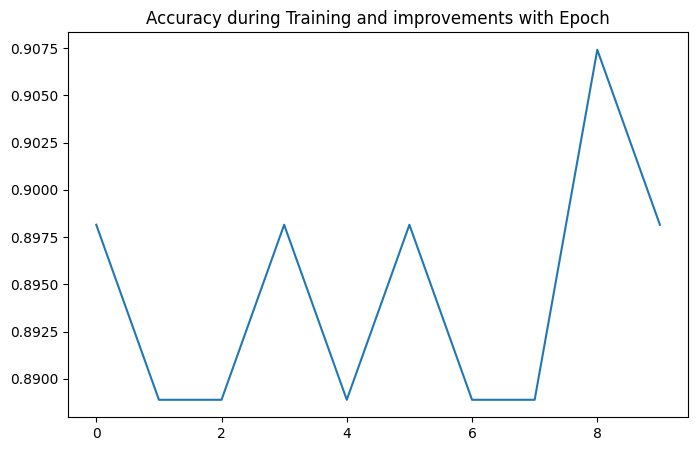


 Evaluating against Test Dataset: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9333 - loss: 0.2835


[0.2835299074649811, 0.9333333373069763]

In [16]:
# Finally let's train the model with the test dataset above

# Enable the verbose mode so we can see the progress of training
VERBOSE = True

# Configure Hyperparameters for training (which we already did as our last step, but in reality
# we have to experiment / trail and error with the below paramaters to tune / train the model efficiently
BATCH_SIZE = 16 # 2 pwer n range - How many records from the dataset should be used in one training cycle ?
EPOCHS = 10 # How many times the training cycle should be executed recurrently in a loop ?
VALIDATION_SPLIT = 0.2 # How many amount of data from the dataset should be used for validation ?
# here we use 20% of data to validate the model training efficiency ? In real world, the
# recommened percentage is 10%

print("\n Training is in progress: \n ----------------------")

# Traning is veru straight forward using Keras single function `model.fit`, this function
# also captures details about the training. This below step trains the mode initializing weights and biases
# and performs Graident Descent mechanism and finally saves the weights in the model, exposes
# the history of training as the return variable
history = model.fit(
    x_train,
    y_train,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    verbose = VERBOSE,
    validation_split = VALIDATION_SPLIT
)
print("\n Accurray during Training \n ----------------------")

# Use this history and plot the accuracy of predictions against each epoch
import matplotlib.pyplot as plt

pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy during Training and improvements with Epoch")
plt.show()

# Finally evulate the model using test database
print("\n Evaluating against Test Dataset: \n")
model.evaluate(x_test, y_test)


In [20]:
# Let's save the model
model.save("iris_training.keras")

# Load the saved model and test it
loaded_model = keras.models.load_model("iris_training.keras")

# Print the model summary about it's parameters and hyperparameters
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)          │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-2 (Dense)          │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,541 (68.52 KB)

 Trainable params: 17,539 (68.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [26]:
# Now that we trained a model, let's try predecting some outputs with it

# Import necessary libraries for numerical operations and label encoding.
# numpy is used for numerical array manipulation, especially with argmax.
# LabelEncoder from sklearn.preprocessing is crucial for converting numerical labels to human-readable strings and vice-versa.
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder. This object will learn the mapping between class names and numerical labels.
label_encoder = LabelEncoder()

# Fit the LabelEncoder with the known class names for the Iris dataset.
# This step is essential because the model outputs a numerical index (e.g., 0, 1, or 2), and we need to map that back
# to the actual species name (e.g., 'setosa').
# The order here defines which numerical label corresponds to which species (e.g., 'setosa' -> 0, 'versicolor' -> 1, 'virginica' -> 2).
label_encoder.fit(['setosa', 'versicolor', 'virginica'])

# Define the input data for which we want to make a prediction.
# This is a 2D array, even for a single sample, as models typically expect batch inputs.
# The values [6.6, 3., 4.4, 1.4] correspond to the four features (sepal length, sepal width, petal length, petal width) of an Iris flower.
prediction_input = [[6.6, 3., 4.4, 1.4]]

# Transform the input data using the previously fitted scaler.
# It's crucial to scale new data with the *same* scaler that was used to scale the training data.
# This ensures consistency and that the model receives inputs in the expected range/distribution.
scaled_input = scaler.transform(prediction_input)
print("Scaled Input data:", scaled_input)

# Make a prediction using the trained neural network model.
# `model.predict()` returns the raw probability distribution (logits after softmax) for each class.
# The output will be an array of probabilities, summing to 1, indicating the model's confidence for each class.
raw_prediction = loaded_model.predict(scaled_input)
# Print the raw probabilities to see the model's confidence across all classes.
print("Raw Prediction output or probabilities: ", raw_prediction)

# Determine the final predicted class by finding the index of the highest probability.
# `np.argmax()` returns the index of the maximum value in the `raw_prediction` array.
# This index corresponds to the class that the model is most confident about.
prediction = np.argmax(raw_prediction)

# Convert the numerical prediction index back to its human-readable class name.
# `label_encoder.inverse_transform()` takes a numerical label (or an array of labels) and maps it back to the original string label.
# We pass `[prediction]` as a list because `inverse_transform` expects an iterable.
print("Prediction is", label_encoder.inverse_transform([prediction]))

Scaled Input data: [[6.6 3.  4.4 1.4]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
Raw Prediction output or probabilities:  [[7.8008234e-06 2.6229653e-04 9.9972993e-01]]
Prediction is ['virginica']


## Notebook Recap: Key Concepts Learned

This notebook provides a comprehensive overview of fundamental concepts in Natural Language Processing (NLP) and demonstrates a complete workflow for training, saving, and deploying a neural network model for classification, specifically using the Iris dataset as an example.

### 1. Understanding NLP Fundamentals (Text Cells):

*   **Out-Of-Vocabulary (OOV) Problem**: Explored the challenge of encountering words not seen during training and common strategies to handle it:
    *   **`<UNK>` (Unknown) Token**: A generic placeholder for OOV words.
    *   **Character Embeddings**: Representing words as sequences of characters to compose meaning.
    *   **Subword Tokenization (e.g., WordPiece, BPE)**: Breaking words into smaller, common units to reduce OOV issues and handle morphology.
    *   **Hashing Trick**: A less common method to map words to fixed-size indices.

*   **Token IDs vs. Embedding Vectors**: A crucial distinction:
    *   **Token IDs**: Unique integer labels assigned to words/subwords/characters during vocabulary building. These are *not learned* but are static identifiers.
    *   **Embedding Vectors**: Dense, floating-point representations that *are learned* during model training. They capture semantic and syntactic information.

*   **The Embedding Mechanism (Library Analogy)**:
    *   Illustrated how tokenizers (the 'librarian') assign unique Token IDs (library IDs) to words (books).
    *   Explained how the embedding matrix (the 'shelves') uses these Token IDs as indices to retrieve the corresponding learned embedding vectors (the 'contents' of the book).
    *   Emphasized that the tokenizer's vocabulary and the embedding matrix's structure are built in tandem, ensuring a stable and unambiguous lookup process.

### 2. Neural Network Model Workflow (Code Cells):

*   **Model Training**: Demonstrated how to train a neural network using Keras:
    *   **Hyperparameters**: Understanding `BATCH_SIZE`, `EPOCHS`, and `VALIDATION_SPLIT`.
    *   **`model.fit()`**: The core function for training, initializing weights/biases, and performing gradient descent.
    *   **Training History**: Capturing and visualizing training progress (e.g., accuracy improvements over epochs).
    *   **`model.evaluate()`**: Assessing the model's performance on unseen test data.

*   **Model Management**: Essential steps for handling trained models:
    *   **Saving a Model**: Using `model.save()` to persist the trained model (weights, architecture, optimizer state) to disk.
    *   **Loading a Model**: Using `keras.models.load_model()` to re-load a saved model for inference or further training.
    *   **`model.summary()`**: Inspecting the model's architecture, layers, output shapes, and parameter counts.

*   **Model Inference (Prediction)**: How to use a trained model to make predictions on new data:
    *   **Preprocessing Input**: Scaling new input data using the *same scaler* fitted during training to maintain consistency.
    *   **`LabelEncoder`**: Using `sklearn.preprocessing.LabelEncoder` to convert categorical labels to numerical format during training and, importantly, to `inverse_transform` numerical predictions back to human-readable labels.
    *   **`model.predict()`**: Obtaining raw probability distributions for each class.
    *   **`np.argmax()`**: Determining the final predicted class by selecting the class with the highest probability.